In [8]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix, lil_matrix, save_npz, load_npz
import json
import csv
import matplotlib.pyplot as plt
import seaborn as sns

## Surprise (recommender system library)

Will perform cross validation for SVD implementation with varying number of factors to get a learning curve. Possible algorithms could include: [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]

In [38]:
%%time
from surprise import SVD
from surprise import Reader, Dataset
from surprise.model_selection import cross_validate
import pandas as pd

# User, Route, Rating dataframe
df_new = pd.read_csv('data/user_routes/user_routes_reduced.csv')

# Create reader object
reader = Reader(rating_scale=(0,4))
data = Dataset.load_from_df(df_new, reader)

benchmark = []
algorithms = [SVD(n_factors=2, n_epochs=1, random_state=42, verbose=True),
              SVD(n_factors=2, n_epochs=10, random_state=42, verbose=True),
              SVD(n_factors=2, n_epochs=20, random_state=42, verbose=True),
              SVD(n_factors=2, n_epochs=40, random_state=42, verbose=True),
              SVD(n_factors=2, n_epochs=60, random_state=42, verbose=True),
              SVD(n_factors=5, n_epochs=1, random_state=42, verbose=True),
              SVD(n_factors=5, n_epochs=10, random_state=42, verbose=True),
              SVD(n_factors=5, n_epochs=20, random_state=42, verbose=True),
              SVD(n_factors=5, n_epochs=40, random_state=42, verbose=True),
              SVD(n_factors=5, n_epochs=60, random_state=42, verbose=True),
              SVD(n_factors=10, n_epochs=1, random_state=42, verbose=True),
              SVD(n_factors=10, n_epochs=10, random_state=42, verbose=True),
              SVD(n_factors=10, n_epochs=20, random_state=42, verbose=True),
              SVD(n_factors=10, n_epochs=40, random_state=42, verbose=True),
              SVD(n_factors=10, n_epochs=60, random_state=42, verbose=True),
              SVD(n_factors=20, n_epochs=1, random_state=42, verbose=True),
              SVD(n_factors=20, n_epochs=10, random_state=42, verbose=True),
              SVD(n_factors=20, n_epochs=20, random_state=42, verbose=True),
              SVD(n_factors=20, n_epochs=40, random_state=42, verbose=True),
              SVD(n_factors=20, n_epochs=60, random_state=42, verbose=True),
              SVD(n_factors=40, n_epochs=1, random_state=42, verbose=True),
              SVD(n_factors=40, n_epochs=10, random_state=42, verbose=True),
              SVD(n_factors=40, n_epochs=20, random_state=42, verbose=True),
              SVD(n_factors=40, n_epochs=40, random_state=42, verbose=True),
              SVD(n_factors=40, n_epochs=60, random_state=42, verbose=True),
             ]

# Iterate over all algorithms
for algorithm in algorithms:
    print(algorithm)
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

Processing epoch 0
Processing epoch 0
Processing epoch 0
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Pro

Processing epoch 0
Processing epoch 0
Processing epoch 0
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Pro

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 0
Processing epoch 1
Pr

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 0
Processing epoch 1
Pr

Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Pr

In [40]:
# Properly tabulate results
cv_results = pd.DataFrame(benchmark)
cv_results['n_factors'] = [2,2,2,2,2,5,5,5,5,5,10,10,10,10,10,20,20,20,20,20,40,40,40,40,40]
cv_results['n_epochs'] = [1,10,20,50,100,1,10,20,50,100,1,10,20,50,100,1,10,20,50,100,1,10,20,50,100]
cv_results

,test_rmse,fit_time,test_time,Algorithm,n_factors,n_epochs
0,0.799593,1.054812,4.080428,SVD,2,1
1,0.693426,6.255172,3.604069,SVD,2,10
2,0.671304,12.508769,3.574114,SVD,2,20
3,0.657339,23.937656,4.079502,SVD,2,50
4,0.654218,36.534953,3.966497,SVD,2,100
5,0.799751,1.178783,4.519617,SVD,5,1
6,0.693765,6.749724,3.610703,SVD,5,10
7,0.671916,12.856118,4.166632,SVD,5,20
8,0.658494,26.048457,4.380186,SVD,5,50
9,0.657710,37.255364,3.886443,SVD,5,100


In [39]:
# # Selectively add results
# # master_cv_results = pd.DataFrame(columns=['test_rmse', 'fit_time', 'test_time', 
# #                                           'Algorithm', 'n_factors', 'n_epochs'])

# master_cv_results = pd.read_csv('results/svd_cv_3.csv')
# master_cv_results = master_cv_results.append(cv_results)
# master_cv_results

In [42]:
# Write file
# master_cv_results.to_csv('results/svd_cv_3.csv', index=False)
cv_results.to_csv('results/svd_cv_3.csv', index=False)

<Figure size 720x720 with 0 Axes>

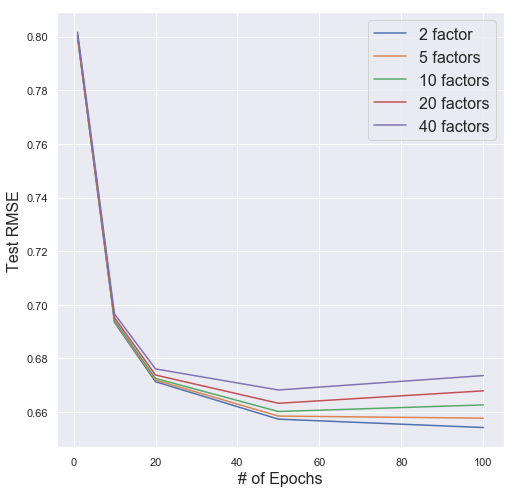

In [44]:
# Load in results data
sns.set()
master_cv_results = pd.read_csv('results/svd_cv_3.csv')

plt.figure(figsize=(10,10))
fig, ax = plt.subplots(figsize=(8,8))

for key, grp in master_cv_results.groupby(['n_factors']):
    ax = grp.plot(ax=ax, kind = 'line', x='n_epochs', y='test_rmse')
    
plt.xlabel('# of Epochs', fontsize=16)
plt.ylabel('Test RMSE', fontsize=16)
plt.legend(['2 factor', '5 factors', '10 factors',
            '20 factors', '40 factors'], loc='best', fontsize=16)

plt.savefig('RMSE.png', bbox_inches='tight')
plt.show()



It seems like having 1 latent factor is sufficient to represent the original matrix in this problem. Greater number of epochs (update rounds) improve RMSE of the validation set. Final model will be n_factors=1 and n_epochs=100.

### Surprise Implementation

In [46]:
%%time
import pandas as pd
from surprise import Reader, Dataset, SVDpp

# User, Route, Rating dataframe
df_new = pd.read_csv('data/user_routes/user_routes_reduced.csv')

# Must create training set object
reader = Reader(rating_scale=(0,4))
data = Dataset.load_from_df(df_new, reader)

# Build and fit the model on all of the data
print('Instantiating Model')
algo = SVDpp(n_factors=5, n_epochs=50, random_state=42, verbose=True)
print('Fitting Model')
output = algo.fit(data.build_full_trainset())

Instantiating Model
Fitting Model
 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
 processing epoch 10
 processing epoch 11
 processing epoch 12
 processing epoch 13
 processing epoch 14
 processing epoch 15
 processing epoch 16
 processing epoch 17
 processing epoch 18
 processing epoch 19
 processing epoch 20
 processing epoch 21
 processing epoch 22
 processing epoch 23
 processing epoch 24
 processing epoch 25
 processing epoch 26
 processing epoch 27
 processing epoch 28
 processing epoch 29
 processing epoch 30
 processing epoch 31
 processing epoch 32
 processing epoch 33
 processing epoch 34
 processing epoch 35
 processing epoch 36
 processing epoch 37
 processing epoch 38
 processing epoch 39
 processing epoch 40
 processing epoch 41
 processing epoch 42
 processing epoch 43
 processing epoch 44
 processing epoch 45
 processin

Model training took XX minutes to complete

#### Making predictions

In [47]:
# Save appropriate information
U = output.pu
Vt = output.qi.T
b_u = output.bu
b_i = output.bi
mu = np.average(df_new['Rating'])

# Save eigen vectors and values .npy
np.save('matrices/U_5.npy', U)
np.save('matrices/Vt_5.npy', Vt)
np.save('matrices/b_u_5.npy', b_u)
np.save('matrices/b_i_5.npy', b_i)

# Save as csv
np.savetxt('matrices/U_5.csv', U, delimiter=",")
np.savetxt('matrices/Vt_5.csv', Vt, delimiter=",")
np.savetxt('matrices/b_u_5.csv', b_u, delimiter=",")
np.savetxt('matrices/b_i_5.csv', b_i, delimiter=",")
print(mu)

2.7401829352698774


In [128]:
# Get all user_ids and route_ids
with open('data/users.txt', 'r') as f:
    user_ids = f.read().splitlines()
    
with open('data/routes.txt', 'r') as f:
    route_ids = f.read().splitlines()

df_new.head()

,UserID,RouteID,Rating
0,10300,108741246,3
1,10300,108742433,3
2,10900,105753541,3
3,12900,105904198,1
4,12900,105904196,3


In [195]:
%%time
current_user = '107153125'

# Make Prediction given a user and route
pred = algo.predict(uid=current_user, iid='0')
score = pred.est
print(score)

2.7401829352698774
CPU times: user 96 µs, sys: 14 µs, total: 110 µs
Wall time: 108 µs


In [197]:
%%time
# Make predictions using built in function
# Must make arbitrary test set (user, route, made_up rating [doesn't matter])
testset = [[int(current_user), iid, 4.] for iid in route_ids]
predictions = algo.test(testset)

# Reformat into array
pred_ratings = np.array([pred.est for pred in predictions])
print(pred_ratings)
print(max(pred_ratings))

[1.86938119 1.96982801 1.9290113  ... 1.83393802 1.85764977 1.81856413]
2.9135373819203325
CPU times: user 1min 30s, sys: 896 ms, total: 1min 31s
Wall time: 1min 31s


In [198]:
%%time
# Make predictions using stored matrices
# Get index of current user
user_index = user_ids.index(current_user)

# Lookup variables
U = output.pu
Vt = output.qi.T
b_u = output.bu
b_i = output.bi
mu = np.average(df_new['Rating'])

user_predicted_ratings = np.dot(U[user_index], Vt) + b_u[user_index] + b_i + mu
print(user_predicted_ratings)
print(max(user_predicted_ratings))

[1.86921953 1.96937812 1.92874256 ... 1.83411343 1.85764142 1.8187674 ]
2.913663747149128
CPU times: user 57.8 ms, sys: 1.67 ms, total: 59.5 ms
Wall time: 16.8 ms


Conclusion is that the underlying matrices were built in order (indexing) of UserIDs and RouteIDs from the df_new dataframe

In [134]:
import numpy as np

# Get a list of all route ids
route_ids = df_new['RouteID'].unique()

# Get a list of routes a user has rated
completed_routes = df_new.loc[df_new['UserID'] == int(current_user), 'RouteID']

# Remove the RouteIDs the user has rated from the list of all route ids
incomplete_routes = np.setdiff1d(route_ids, completed_routes)

print("Original set of routes:", len(route_ids))
print("Routes not done by user:", len(incomplete_routes))

Original set of routes: 104787
Routes not done by user: 104785


In [135]:
%%time
# Make predictions
# Must make arbitrary test set (user, route, made_up rating [doesn't matter])
testset = [[int(current_user), iid, 4.] for iid in incomplete_routes]
testset = sorted(testset)
predictions = algo.test(testset)

# Reformat into array
pred_ratings = np.array([pred.est for pred in predictions])

# Get index of highest rating
i_max = pred_ratings.argmax()

# Use this to find the corresponding iid to recommend
iid = incomplete_routes[i_max]
print("Top item for user 50 has iid {0} with predicted rating {1}".format(iid, pred_ratings[i_max]))

Top item for user 50 has iid 105835705 with predicted rating 3.8278376546167543
CPU times: user 2.41 s, sys: 34.5 ms, total: 2.45 s
Wall time: 2.42 s


In [137]:
max(pred_ratings)

3.8278376546167543

## SCIPY IMPLEMENTATION
- OLD CODE

In [ ]:
# Load in sparse matrix
sp_mat = load_npz('sparse_matrix/full_matrix.npz')
print(sp_mat.shape)
sp_mat

In [ ]:
# Convert back to dense matrix
dense_mat = sp_mat.todense()
dense_mat.shape

In [ ]:
%%time
# Mean center each user
user_ratings_mean = np.mean(dense_mat, axis = 1)
R_demeaned = dense_mat - user_ratings_mean.reshape(-1, 1)

In [ ]:
%%time
from scipy.sparse.linalg import svds

# SVD
U, sigma, Vt = svds(R_demeaned, k = 10)

# Sigma (just get the diaganol)
sigma = np.diag(sigma)

In [ ]:
# Save eigen vectors and values .npy
np.save('sparse_matrix/U.npy', U)
np.save('sparse_matrix/Vt.npy', Vt)
np.save('sparse_matrix/sigma.npy', sigma)

# Save as csv
np.savetxt('sparse_matrix/U.csv', U, delimiter=",")
np.savetxt('sparse_matrix/Vt.csv', Vt, delimiter=",")
np.savetxt('sparse_matrix/sigma.csv', sigma, delimiter=",")

In [ ]:
# Making Predictions from decomposed matrices
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [ ]:
# Save as csv
np.savetxt('sparse_matrix/svd_ratings.csv', all_user_predicted_ratings, delimiter=',')

In [ ]:
# Create DataFrame
preds_df = pd.DataFrame(all_user_predicted_ratings)

In [ ]:
for i in range(preds_df.shape[0]):
    userID = i
    user_recommendations = preds_df.iloc[userID]

    # Make recommendations based on threshold
    print(user_recommendations[user_recommendations > 1.0])